Food Production Analysis - 2022/06/12 - AV

In [123]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
pytrend = TrendReq()

In [67]:
# Keywords
kw_list=['Vegan']

pytrend.build_payload(kw_list,timeframe='today 1-m'  ) 
regiondf = trends.interest_by_region()
regiondf = regiondf.sort_values(by=kw_list, ascending=False)
regiondf.dropna(how='all',axis=0, inplace=True)
regiondf = regiondf.head(10)
print(regiondf)

                Vegan
geoName              
United States     100
Canada             93
New Zealand        86
Australia          68
United Kingdom     44
South Africa       41
Slovenia           34
Sweden             34
Portugal           31
Finland            31


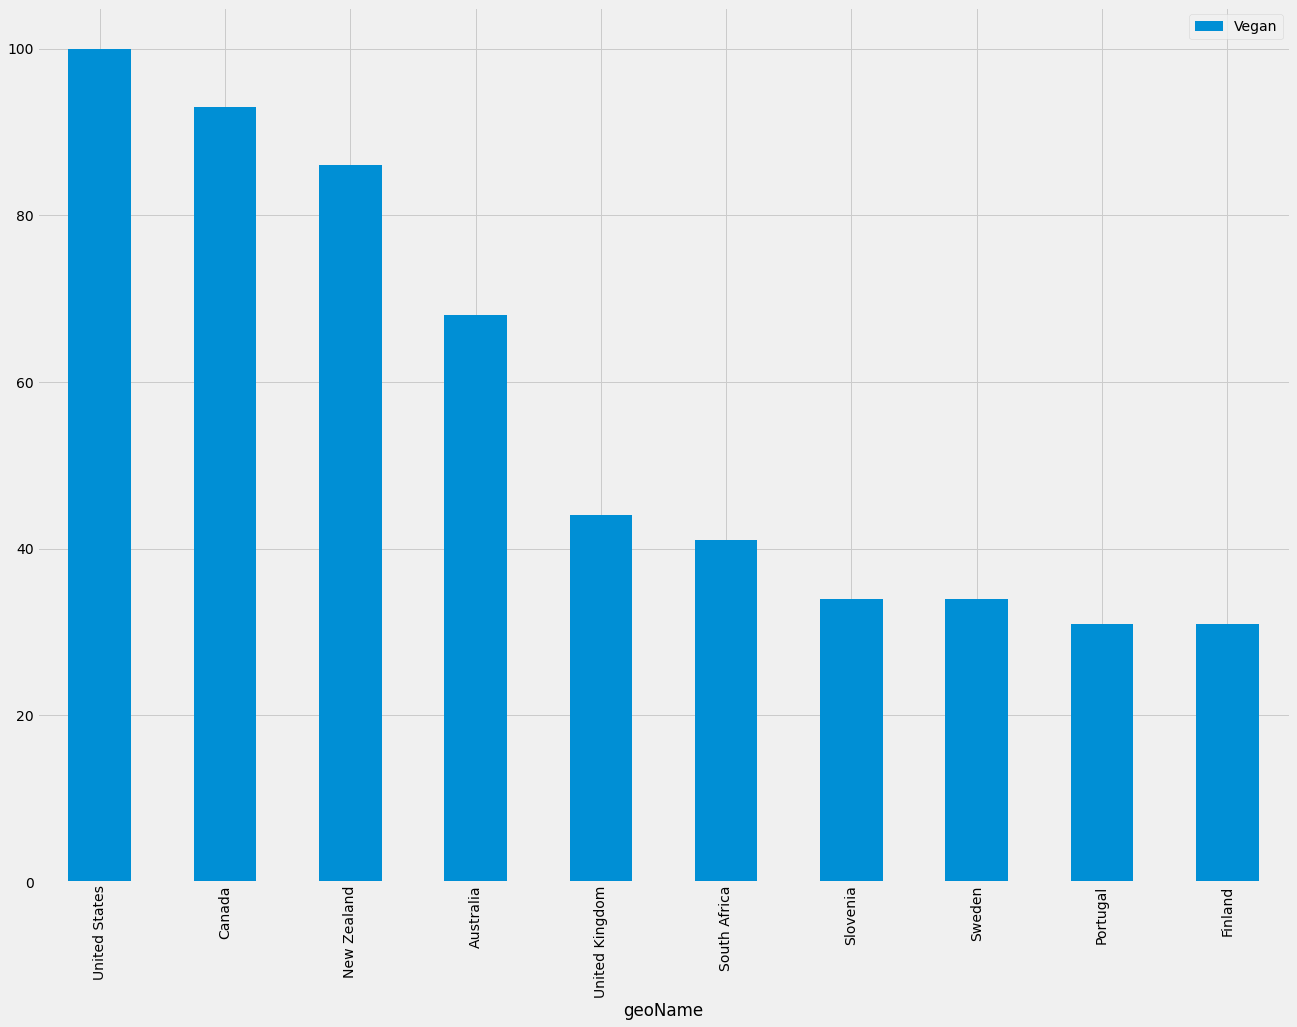

In [68]:
regiondf.reset_index().plot(x="geoName", y=kw_list, 
                        figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [61]:
#get related queries
related_queries = pytrend.related_queries()
related_queries.values()

#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names

allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 

#check your dataset
allqueries.head(50)

,top query,top query value,related query,related query value
0,vegan food,100,is gordon ramsay vegan 2022,750.0
1,vegan near me,94,slutty vegan athens,700.0
2,vegan restaurants,55,gordon ramsay vegan,450.0
3,vegan restaurant,44,vegan nedir,140.0
4,vegan recipes,40,slutty vegan,130.0
5,vegan protein,35,vegan sandwich fillings,110.0
6,vegan food near me,31,vegan ranch dressing recipe,90.0
7,vegan cake,31,slutty vegan menu,90.0
8,vegan cream,30,vegan spam,70.0
9,vegetarian,28,vegan hot dogs,60.0


In [98]:
df = pd.read_csv('Food_Production.csv')
df.head(10)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.55208,NaN


In [117]:
list(df.columns)

['Food product',
 'Land use change',
 'Animal Feed',
 'Farm',
 'Processing',
 'Transport',
 'Packging',
 'Retail',
 'Total_emissions',
 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
 'Freshwater withdrawals per 100g protein (liters per 100g protein)',
 'Freshwater withdrawals per kilogram (liters per kilogram)',
 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
 'Land use per 1000kcal (m² per 1000kcal)',
 'Land use per kilogram (m² per kilogram)',
 'Land use per 100g protein (m² per 100g protein)',
 'Scarcity-weighted water use per kilogram (liters per kilogram)',
 'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
 'Scarcity-weighted water use per 1000kcal (liters per 

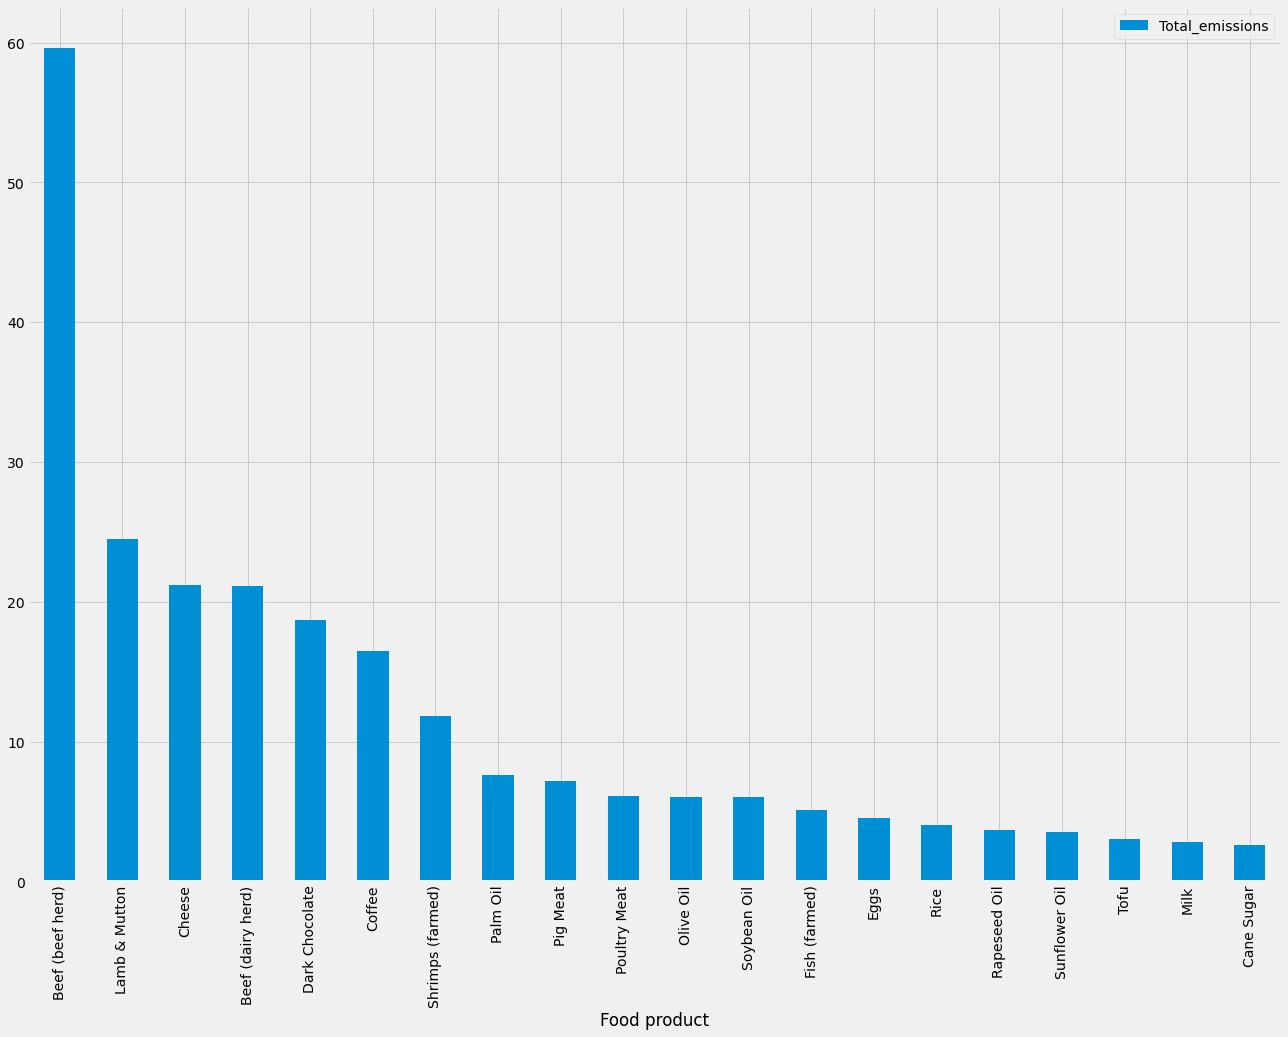

In [119]:
df.sort_values('Total_emissions', ascending = False).head(20).plot(x='Food product', y='Total_emissions',
                       figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

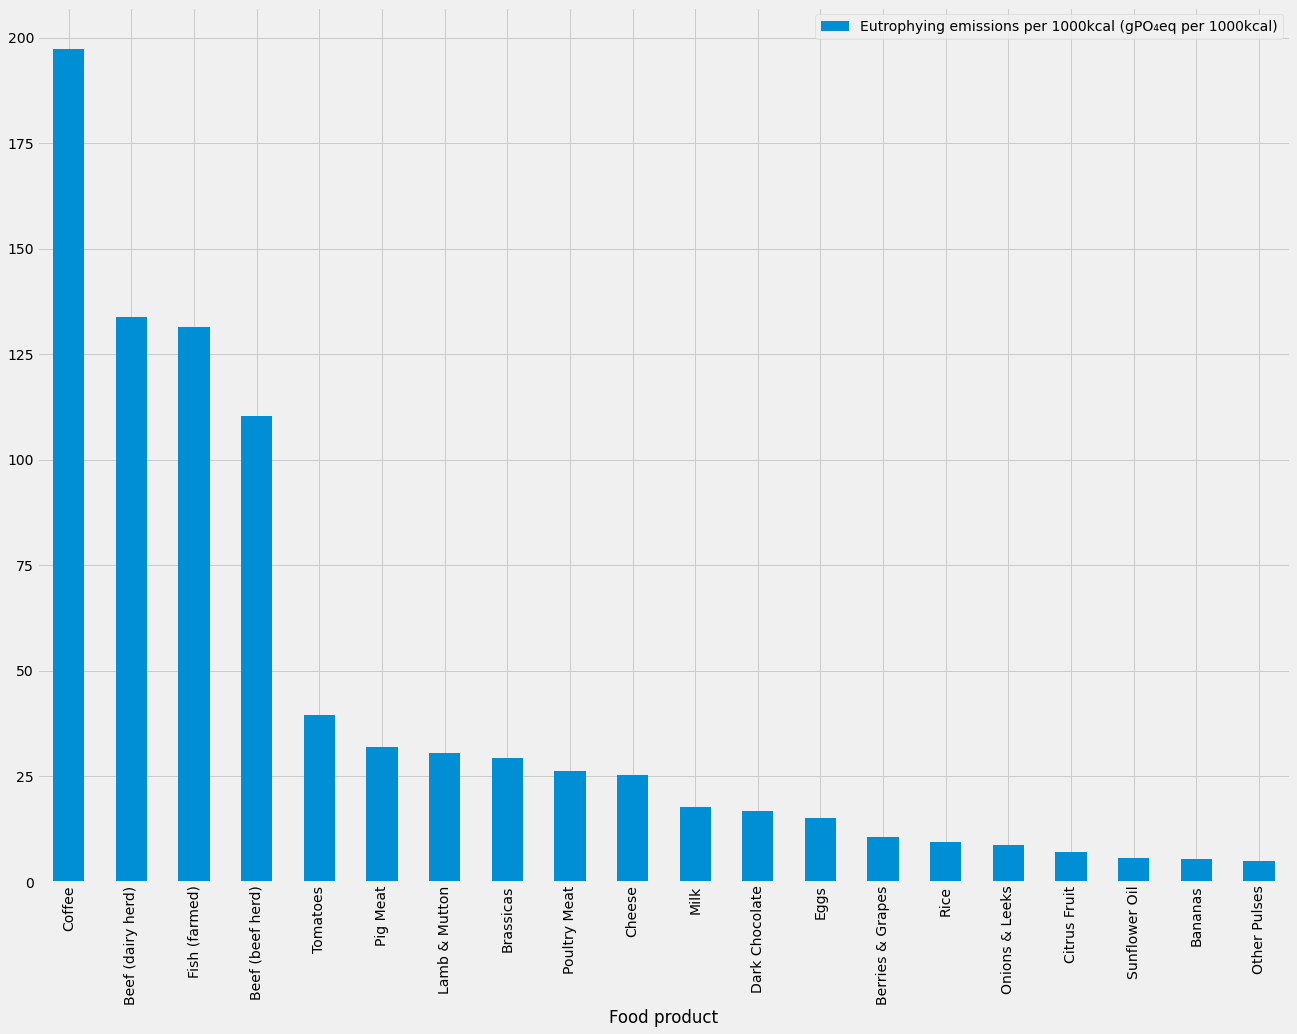

In [120]:
df.sort_values('Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending = False).head(20).plot(x='Food product', y='Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
                       figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

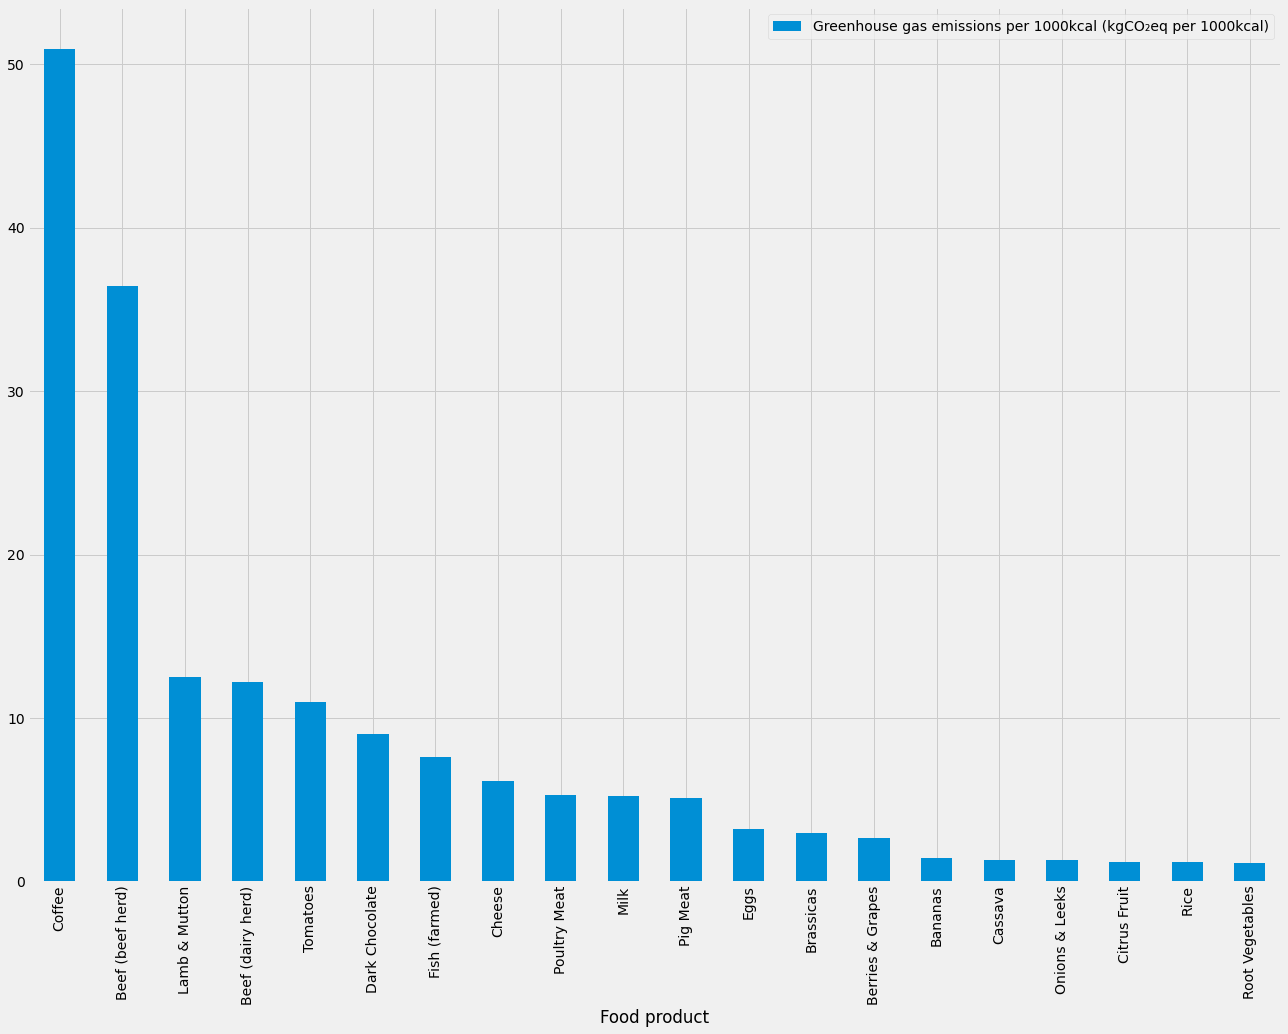

In [121]:
df.sort_values('Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending = False).head(20).plot(x='Food product', y='Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
                       figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

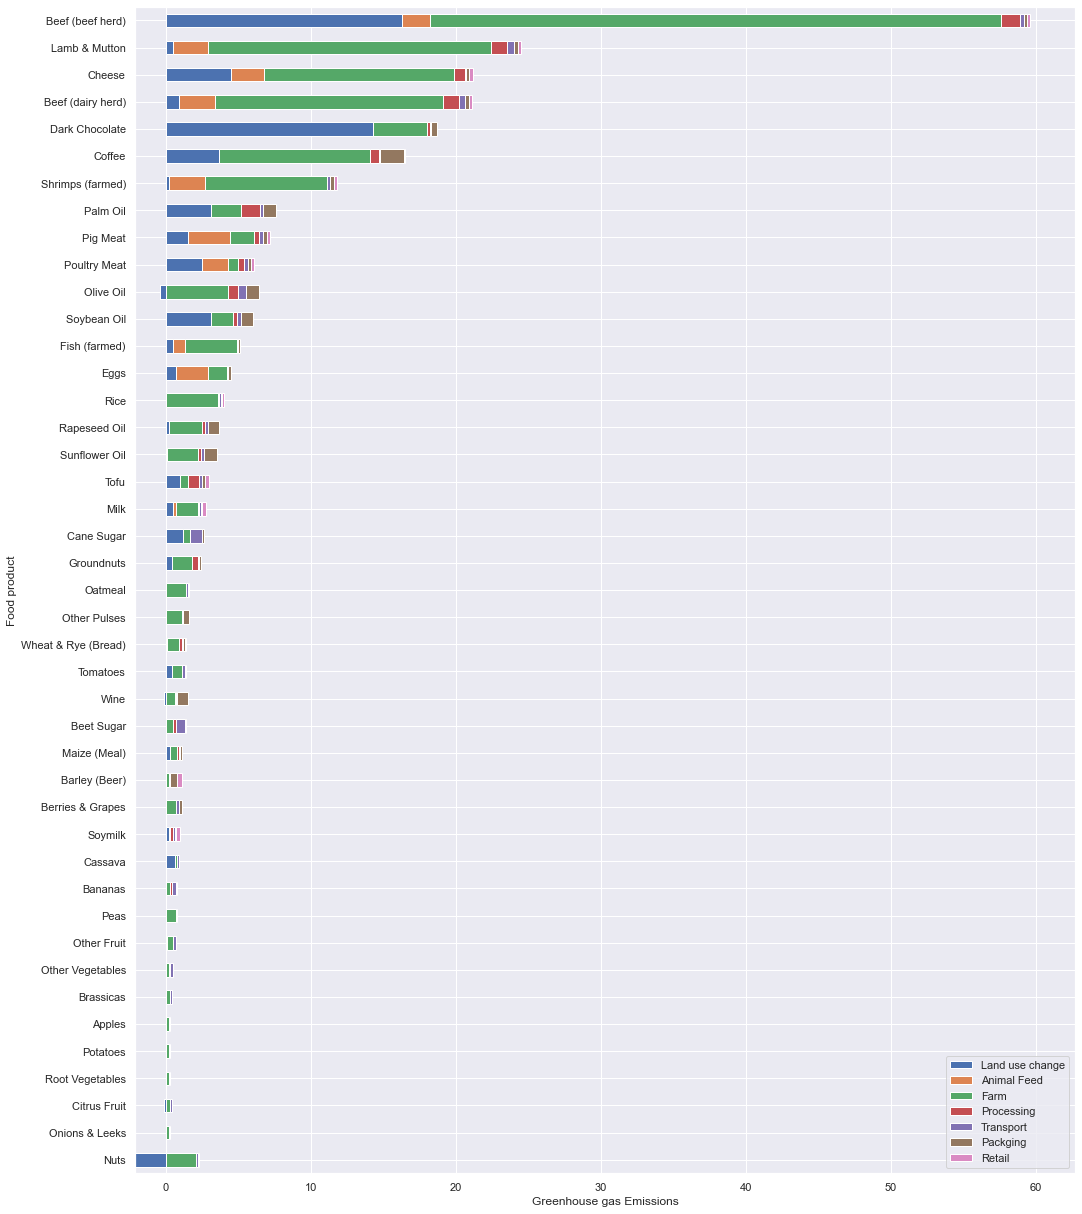

In [130]:
temp_df= df.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.show()